In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns


import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/youtube-new/DE_category_id.json
/kaggle/input/youtube-new/MXvideos.csv
/kaggle/input/youtube-new/IN_category_id.json
/kaggle/input/youtube-new/FRvideos.csv
/kaggle/input/youtube-new/RUvideos.csv
/kaggle/input/youtube-new/USvideos.csv
/kaggle/input/youtube-new/US_category_id.json
/kaggle/input/youtube-new/DEvideos.csv
/kaggle/input/youtube-new/INvideos.csv
/kaggle/input/youtube-new/RU_category_id.json
/kaggle/input/youtube-new/CAvideos.csv
/kaggle/input/youtube-new/KRvideos.csv
/kaggle/input/youtube-new/GBvideos.csv
/kaggle/input/youtube-new/FR_category_id.json
/kaggle/input/youtube-new/CA_category_id.json
/kaggle/input/youtube-new/JPvideos.csv
/kaggle/input/youtube-new/JP_category_id.json
/kaggle/input/youtube-new/KR_category_id.json
/kaggle/input/youtube-new/GB_category_id.json
/kaggle/input/youtube-new/MX_category_id.json
/kaggle/input/youtube8m/sample_submission.csv.zip
/kaggle/input/youtube8m/label_names.csv.zip


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns


import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline

import plotly.offline as py
#py.init_notebook_mode(connected=True)
#mport plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff


from scipy.optimize import curve_fit

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/youtube-new/DE_category_id.json
/kaggle/input/youtube-new/MXvideos.csv
/kaggle/input/youtube-new/IN_category_id.json
/kaggle/input/youtube-new/FRvideos.csv
/kaggle/input/youtube-new/RUvideos.csv
/kaggle/input/youtube-new/USvideos.csv
/kaggle/input/youtube-new/US_category_id.json
/kaggle/input/youtube-new/DEvideos.csv
/kaggle/input/youtube-new/INvideos.csv
/kaggle/input/youtube-new/RU_category_id.json
/kaggle/input/youtube-new/CAvideos.csv
/kaggle/input/youtube-new/KRvideos.csv
/kaggle/input/youtube-new/GBvideos.csv
/kaggle/input/youtube-new/FR_category_id.json
/kaggle/input/youtube-new/CA_category_id.json
/kaggle/input/youtube-new/JPvideos.csv
/kaggle/input/youtube-new/JP_category_id.json
/kaggle/input/youtube-new/KR_category_id.json
/kaggle/input/youtube-new/GB_category_id.json
/kaggle/input/youtube-new/MX_category_id.json
/kaggle/input/youtube8m/sample_submission.csv.zip
/kaggle/input/youtube8m/label_names.csv.zip


Import all the CSV files (US, CA, DE, GB, FR, IN ..)

In [4]:
import glob
files = [i for i in glob.glob('../input/youtube-new/*.{}'.format('csv'))]
sorted(files)

['../input/youtube-new/CAvideos.csv',
 '../input/youtube-new/DEvideos.csv',
 '../input/youtube-new/FRvideos.csv',
 '../input/youtube-new/GBvideos.csv',
 '../input/youtube-new/INvideos.csv',
 '../input/youtube-new/JPvideos.csv',
 '../input/youtube-new/KRvideos.csv',
 '../input/youtube-new/MXvideos.csv',
 '../input/youtube-new/RUvideos.csv',
 '../input/youtube-new/USvideos.csv']

# **Importing Dataset**

In [5]:
us_videos = pd.read_csv('../input/youtube-new/USvideos.csv')
us_videos_categories = pd.read_json('../input/youtube-new/US_category_id.json')

In [6]:
us_videos.head(3)

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   

                                               title    channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE     CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...  LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...     Rudy Mancuso   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   

   dislikes  comment_count                                  thumbnail_link  \
0      2966          15954  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
1      6146          12703  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   

                                         description  
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...  
1  One year after the presidential election, John...  
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...

In [7]:
us_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

# **Data preprocessing and feature engineering**

Firstly we will transform trending_date as well as publish_time from string to datetime format

In [8]:
us_videos['trending_date'] = pd.to_datetime(us_videos['trending_date'], format='%y.%d.%m').dt.date 

# Transforming Trending date column to datetime format and splitting into two separate ones
publish_time = pd.to_datetime(us_videos['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
us_videos['publish_date'] = publish_time.dt.date
us_videos['publish_time'] = publish_time.dt.time
us_videos['publish_hour'] = publish_time.dt.hour

In [9]:
us_videos.head(3)

video_id trending_date  \
0  2kyS6SvSYSE    2017-11-14   
1  1ZAPwfrtAFY    2017-11-14   
2  5qpjK5DgCt4    2017-11-14   

                                               title    channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE     CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...  LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...     Rudy Mancuso   

   category_id publish_time  \
0           22     17:13:01   
1           24     07:30:00   
2           23     19:05:24   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   

   dislikes  comment_count                                  thumbnail_link  \
0      2966          15954  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
1      6146          12703  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   

                                         description publish_date  \
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...   2017-11-13   
1  One year after the presidential election, John...   2017-11-13   
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...   2017-11-12   

   publish_hour  
0            17  
1             7  
2            19

# Using dictionary comprehension, to extract most important data from US_category_id.json

In [10]:
categories = {category['id']: category['snippet']['title'] for category in us_videos_categories['items']}

In [11]:
categories

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '29': 'Nonprofits & Activism',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

# Now we will create new column that will represent name of category

In [12]:
us_videos.insert(4, 'category', us_videos['category_id'].astype(str).map(categories))

In [13]:
us_videos.head(3)

video_id trending_date  \
0  2kyS6SvSYSE    2017-11-14   
1  1ZAPwfrtAFY    2017-11-14   
2  5qpjK5DgCt4    2017-11-14   

                                               title    channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE     CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...  LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...     Rudy Mancuso   

         category  category_id publish_time  \
0  People & Blogs           22     17:13:01   
1   Entertainment           24     07:30:00   
2          Comedy           23     19:05:24   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   

   dislikes  comment_count                                  thumbnail_link  \
0      2966          15954  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
1      6146          12703  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   

                                         description publish_date  \
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...   2017-11-13   
1  One year after the presidential election, John...   2017-11-13   
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...   2017-11-12   

   publish_hour  
0            17  
1             7  
2            19

# **Correlation between** *views, likes, dislikes, comment_count*

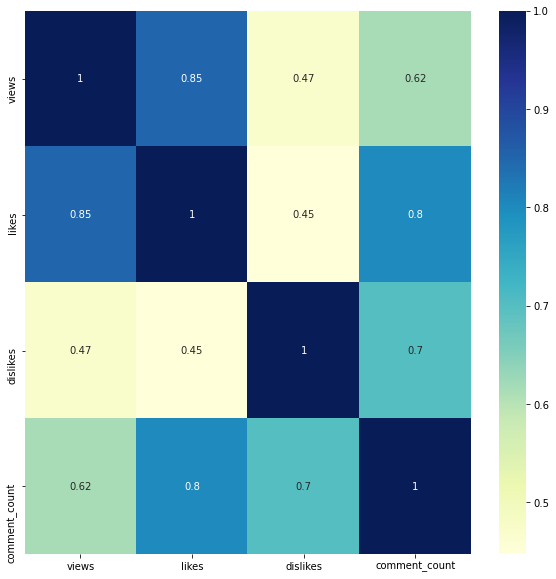

In [14]:
columns_show=['views', 'likes', 'dislikes', 'comment_count']
f, ax = plt.subplots(figsize=(10, 10))
corr = us_videos[columns_show].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap="YlGnBu",annot=True)

## **In the above matrix, for USA dataset, the columns with :-**

## High Correlation - Views and Likes, Comment_count and Dislikes
## Medium Correlation - Views and Dislikes, Views and Comment_Count, Likes and Comment_Count
## Low Correlation - Likes and Dislike


## Calculating Dislike % and adding a column to df

In [15]:
us_videos['dislike_percentage'] = us_videos['dislikes'] / (us_videos['dislikes'] + us_videos['likes'])

In [16]:
us_videos.head(3)

video_id trending_date  \
0  2kyS6SvSYSE    2017-11-14   
1  1ZAPwfrtAFY    2017-11-14   
2  5qpjK5DgCt4    2017-11-14   

                                               title    channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE     CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...  LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...     Rudy Mancuso   

         category  category_id publish_time  \
0  People & Blogs           22     17:13:01   
1   Entertainment           24     07:30:00   
2          Comedy           23     19:05:24   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   

   dislikes  comment_count                                  thumbnail_link  \
0      2966          15954  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
1      6146          12703  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   

                                         description publish_date  \
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...   2017-11-13   
1  One year after the presidential election, John...   2017-11-13   
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...   2017-11-12   

   publish_hour  dislike_percentage  
0            17            0.049030  
1             7            0.059479  
2            19            0.035271

## new data_frame after deleting duplicates us_videos_last and us_videos_first
## original data_frame is entact

In [17]:
us_videos_last = us_videos.drop_duplicates(subset=['video_id'], keep='last', inplace=False)
us_videos_first = us_videos.drop_duplicates(subset=['video_id'], keep='first', inplace=False)

In [18]:
print("us_videos dataset contains {} videos".format(us_videos.shape[0]))
print("us_videos_first dataset contains {} videos".format(us_videos_first.shape[0]))
print("us_videos_last dataset contains {} videos".format(us_videos_last.shape[0]))

us_videos dataset contains 40949 videos
us_videos_first dataset contains 6351 videos
us_videos_last dataset contains 6351 videos


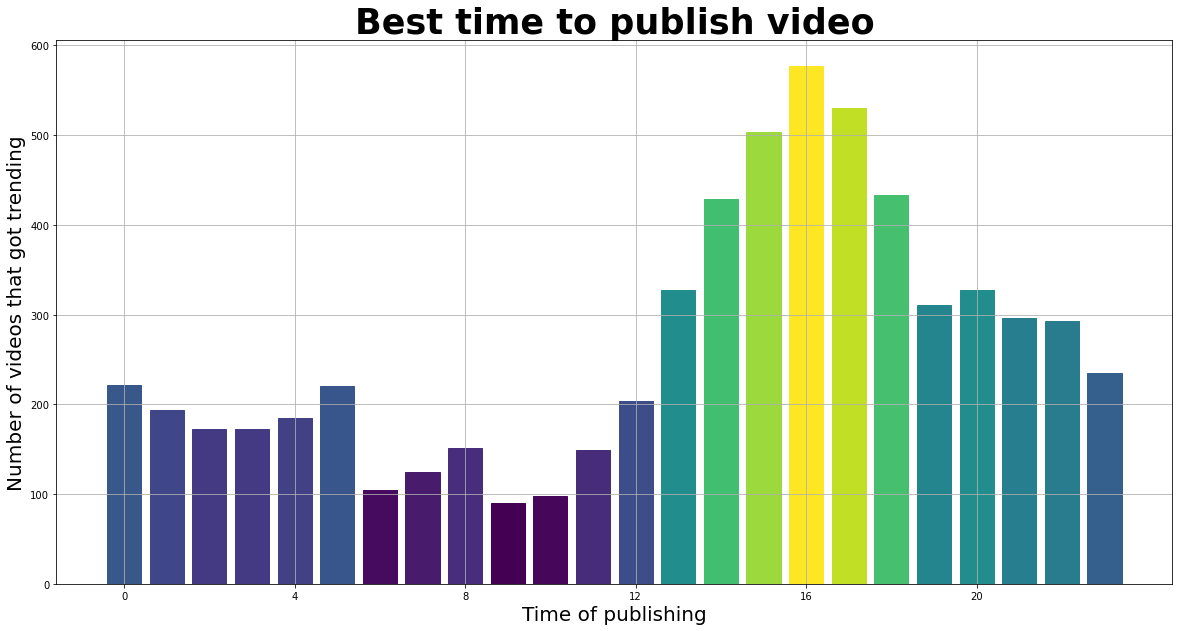

In [19]:
# Initialization of the list storing counters for subsequent publication hours
publish_h = [0] * 24

for index, row in us_videos_first.iterrows():
    publish_h[row["publish_hour"]] += 1
    
values = publish_h
ind = np.arange(len(values))


# Creating new plot
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.yaxis.grid()
ax.xaxis.grid()
bars = ax.bar(ind, values)

# Sampling of Colormap
for i, b in enumerate(bars):
    b.set_color(plt.cm.viridis((values[i] - min(values))/(max(values)- min(values))))
    
plt.ylabel('Number of videos that got trending', fontsize=20)
plt.xlabel('Time of publishing', fontsize=20)
plt.title('Best time to publish video', fontsize=35, fontweight='bold')
plt.xticks(np.arange(0, len(ind), len(ind)/6), [0, 4, 8, 12, 16, 20])

plt.show()

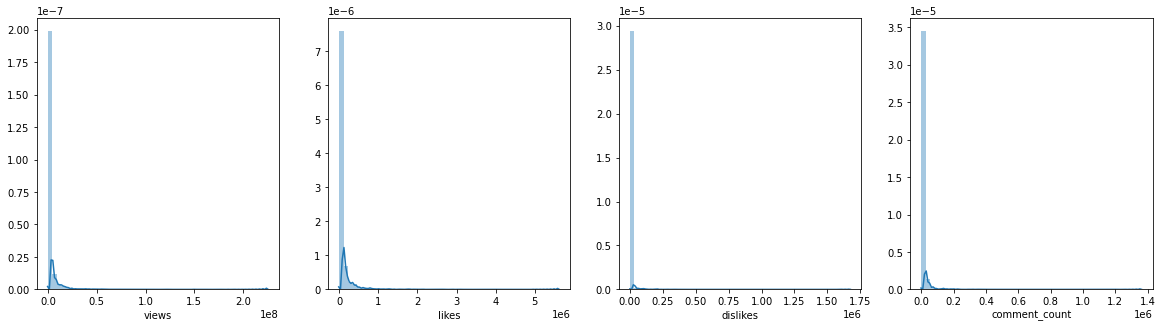

In [20]:
fig,ax=plt.subplots(1,4,figsize=(20,5))


df = us_videos
sns.distplot(df['views'],ax=ax[0])


sns.distplot(df['likes'],ax=ax[1])
sns.distplot(df['dislikes'],ax=ax[2])
sns.distplot(df['comment_count'],ax=ax[3])

# Predicting Video Category (Classification)

In [21]:
import collections
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB


# Bagged Decision Trees for Classification - necessary dependencies
from sklearn.neighbors import KNeighborsClassifier


##classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MaxAbsScaler
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import tree

##metrices
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

In [22]:
Categories_JSON = pd.read_json("../input/youtube-new/US_category_id.json")
Categories_JSON.head(3)

kind  \
0  youtube#videoCategoryListResponse   
1  youtube#videoCategoryListResponse   
2  youtube#videoCategoryListResponse   

                                                etag  \
0  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
1  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
2  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   

                                               items  
0  {'kind': 'youtube#videoCategory', 'etag': '"m2...  
1  {'kind': 'youtube#videoCategory', 'etag': '"m2...  
2  {'kind': 'youtube#videoCategory', 'etag': '"m2...

In [23]:
categories = [{'id': item['id'], 'title': item['snippet']['title']} for item in us_videos_categories['items']]

In [24]:
CategoriesDF = pd.DataFrame(categories)
Categories = CategoriesDF.rename(index=str, columns={"id": "Category_ID", "title": "Category"})
Categories.head(3)

Category_ID          Category
0           1  Film & Animation
1           2  Autos & Vehicles
2          10             Music

## countvectorizer

In [25]:
vector = CountVectorizer()
counts = vector.fit_transform(us_videos['title'].values)

In [26]:
keep_columns = ['title','category_id']
US_df = us_videos[keep_columns]
US_df.to_csv("newUS.csv", index=False)
US_df = pd.read_csv("newUS.csv", header=0, names=['Title','Category_ID'])

In [27]:
accuracy = []
algos = []

## Classifier 1 : Naive Bayes

In [28]:

NB_Model = MultinomialNB()
targets = US_df['Category_ID'].values
NB_Model.fit(counts,targets)

MultinomialNB()

In [29]:

X= counts
y= targets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

NBtest = MultinomialNB().fit(X_train, y_train)
nb_predictions = NBtest.predict(X_test)
acc_nb = NBtest.score(X_test, y_test)
print('The Naive Bayes Algorithm scored an accuracy of', acc_nb)

The Naive Bayes Algorithm scored an accuracy of 0.8853886853886854


In [30]:
accuracy.append(acc_nb)
algos.append('NB')


## Confusion Matrix for Naive Bayes

In [31]:
from sklearn.metrics import confusion_matrix

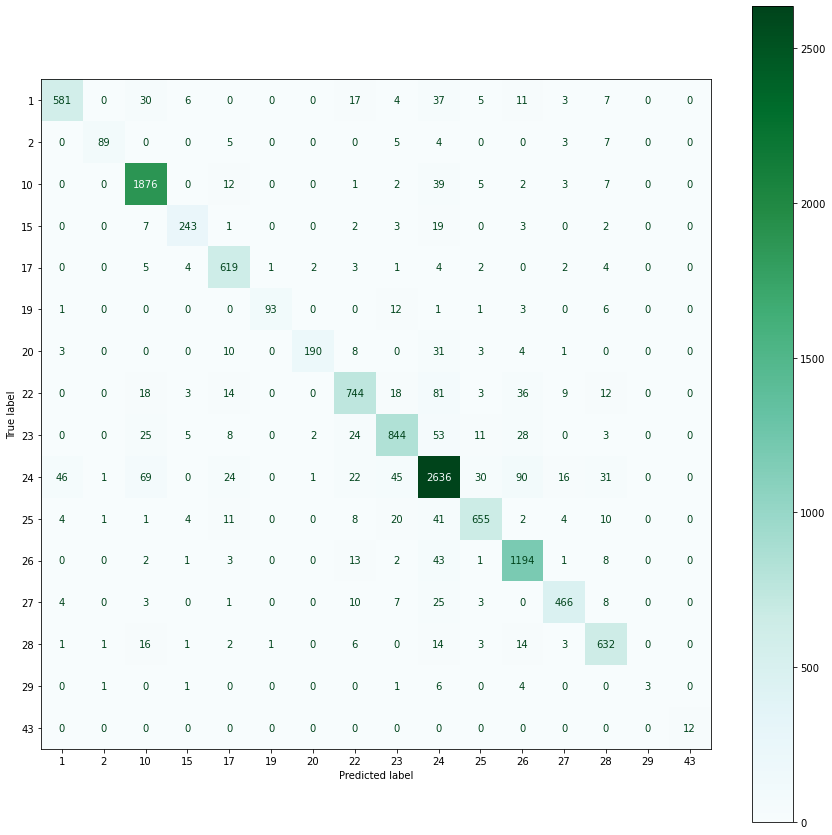

In [32]:

fig, ax = plt.subplots(figsize=(15, 15))
plot_confusion_matrix(NBtest, X_test, y_test, ax=ax, cmap = 'BuGn')

## classification report

In [33]:

from sklearn.metrics import classification_report
print(classification_report(y_test,nb_predictions))

              precision    recall  f1-score   support

           1       0.91      0.83      0.87       701
           2       0.96      0.79      0.86       113
          10       0.91      0.96      0.94      1947
          15       0.91      0.87      0.89       280
          17       0.87      0.96      0.91       647
          19       0.98      0.79      0.88       117
          20       0.97      0.76      0.85       250
          22       0.87      0.79      0.83       938
          23       0.88      0.84      0.86      1003
          24       0.87      0.88      0.87      3011
          25       0.91      0.86      0.88       761
          26       0.86      0.94      0.90      1268
          27       0.91      0.88      0.90       527
          28       0.86      0.91      0.88       694
          29       1.00      0.19      0.32        16
          43       1.00      1.00      1.00        12

    accuracy                           0.89     12285
   macro avg       0.92   

In [34]:

Titles = ["Hilarious cat plays with toy",
        "Best fashion looks for Spring 2018",
        "Olympics opening ceremony highlights",
        "Warriors basketball game versus the cavs",
        "CNN world news on donald trump",
        "Police Chase in Hollywood",
        "Ed Sheeran - Perfect (Official Music Video)",
        "how to do eyeshadow"
         ]

In [35]:

Titles_counts = vector.transform(Titles)
Predict = NB_Model.predict(Titles_counts)
Predict

array([24, 24, 17, 17, 25, 26, 10, 26])

In [36]:
X= counts
y= targets

## Classifier 2: KNN

In [37]:
KNN_model = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training sets
KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

In [38]:
y_pred = KNN_model.predict(X_test)

In [39]:

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
knnacc = metrics.accuracy_score(y_test, y_pred)

Accuracy: 0.9118437118437118


In [40]:
accuracy.append(knnacc)
algos.append('KNN')

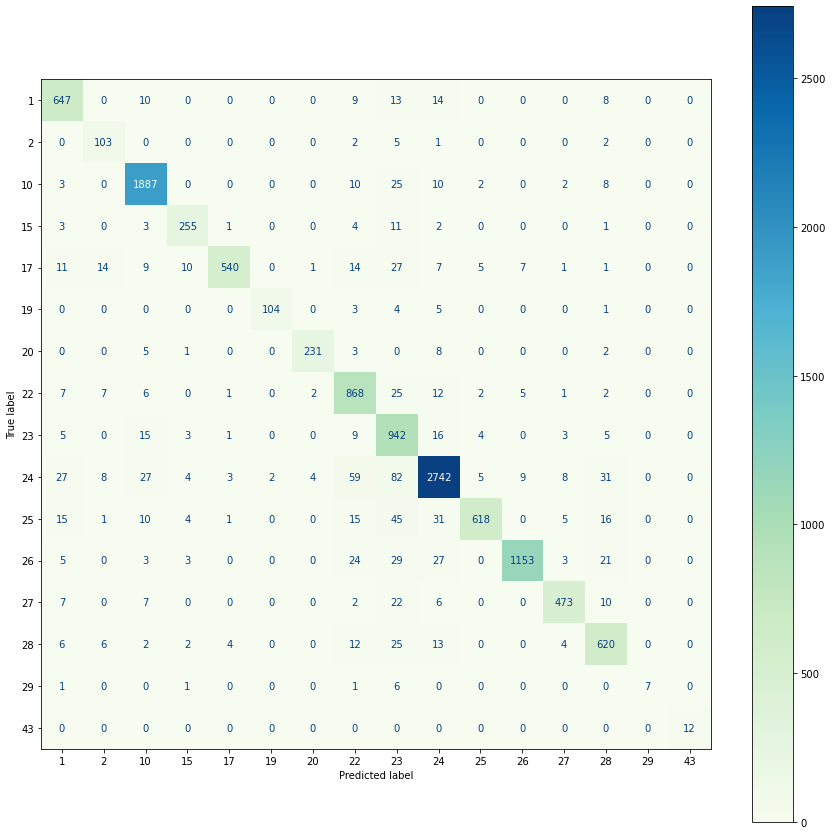

In [41]:

fig, ax = plt.subplots(figsize=(15, 15))
plot_confusion_matrix(KNN_model, X_test, y_test, ax=ax, cmap = plt.cm.GnBu)


In [42]:

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.88      0.92      0.90       701
           2       0.74      0.91      0.82       113
          10       0.95      0.97      0.96      1947
          15       0.90      0.91      0.91       280
          17       0.98      0.83      0.90       647
          19       0.98      0.89      0.93       117
          20       0.97      0.92      0.95       250
          22       0.84      0.93      0.88       938
          23       0.75      0.94      0.83      1003
          24       0.95      0.91      0.93      3011
          25       0.97      0.81      0.88       761
          26       0.98      0.91      0.94      1268
          27       0.95      0.90      0.92       527
          28       0.85      0.89      0.87       694
          29       1.00      0.44      0.61        16
          43       1.00      1.00      1.00        12

    accuracy                           0.91     12285
   macro avg       0.92   

## Classifier 3: Decision Tree

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
DT_model = DecisionTreeClassifier()

# Train Decision Tree Classifer
DT_model = DT_model.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = DT_model.predict(X_test)

In [44]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9806267806267807


In [45]:
DTacc = metrics.accuracy_score(y_test, y_pred)

In [46]:
accuracy.append(DTacc)
algos.append('DT')

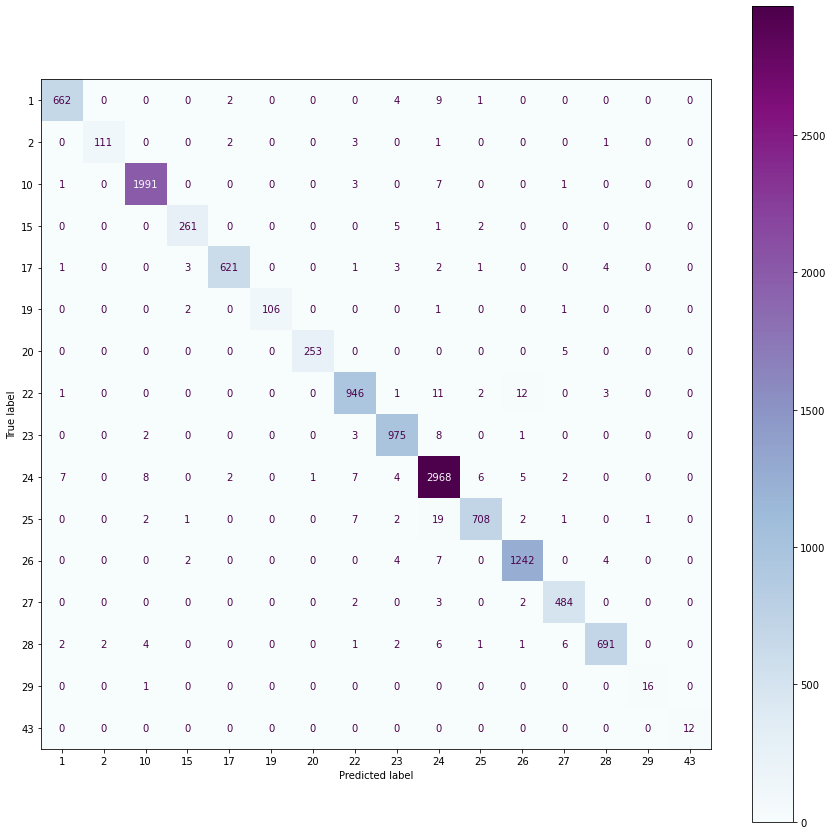

In [47]:
fig, ax = plt.subplots(figsize=(15, 15))
plot_confusion_matrix(DT_model, X_test, y_test, ax=ax, cmap = 'BuPu')


In [48]:

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.98      0.98      0.98       678
           2       0.98      0.94      0.96       118
          10       0.99      0.99      0.99      2003
          15       0.97      0.97      0.97       269
          17       0.99      0.98      0.98       636
          19       1.00      0.96      0.98       110
          20       1.00      0.98      0.99       258
          22       0.97      0.97      0.97       976
          23       0.97      0.99      0.98       989
          24       0.98      0.99      0.98      3010
          25       0.98      0.95      0.97       743
          26       0.98      0.99      0.98      1259
          27       0.97      0.99      0.98       491
          28       0.98      0.97      0.97       716
          29       0.94      0.94      0.94        17
          43       1.00      1.00      1.00        12

    accuracy                           0.98     12285
   macro avg       0.98   

In [49]:
df_acc_algo = pd.DataFrame(list(zip(algos, accuracy)), 
               columns =['Algo', 'Accuracy']) 

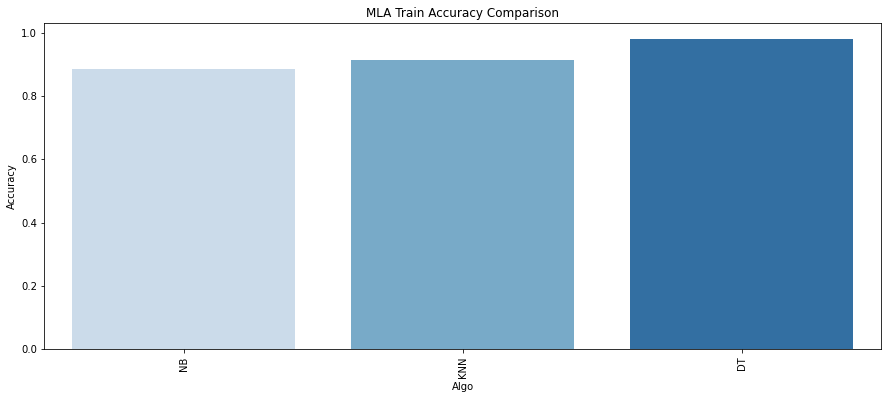

  Algo  Accuracy
0   NB  0.885389
1  KNN  0.911844
2   DT  0.980627


In [50]:
plt.subplots(figsize=(15,6))
sns.barplot(x="Algo", y="Accuracy",data=df_acc_algo ,palette='Blues')
plt.xticks(rotation=90)
plt.title('MLA Train Accuracy Comparison')
plt.show()
print(df_acc_algo)


## Ensemble

In [51]:
vector = CountVectorizer()
counts = vector.fit_transform(us_videos['title'].values)

In [52]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import cohen_kappa_score
from sklearn.svm import SVC

## bagging

X= counts
y= targets
estimators=[]
model1=KNeighborsClassifier(n_neighbors=3)
estimators.append(('KNN',model1))

model2=DecisionTreeClassifier()
estimators.append(('dt',model2))

model3=SVC()
estimators.append(('svm',model3))
#bagging ensemble
ensemble = VotingClassifier(estimators)
eclf1=ensemble.fit(X_train,y_train)
y_pred=eclf1.predict(X_test)
accuracy_score(y_test,y_pred)

In [53]:
# Create adaboost classifer object with 50 estimators(default) and decision tree classifier as baseestimator(default)
from sklearn.ensemble import AdaBoostClassifier

abc=AdaBoostClassifier(n_estimators=50)
model=abc.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [54]:
metrics.accuracy_score(y_test,y_pred)

0.29711029711029713

## Adaboost using SVC

In [55]:
#create svc object
svc=SVC(probability=True,kernel='linear')

In [56]:
# Create adaboost classifer object
adb=AdaBoostClassifier(n_estimators=50,base_estimator=svc)
model=abc.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(y_pred)

[24 24 10 ... 24 24 24]


In [57]:
metrics.accuracy_score(y_test,y_pred)

0.29711029711029713

## Bagging classifier with decision tree

In [58]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.977940577940578

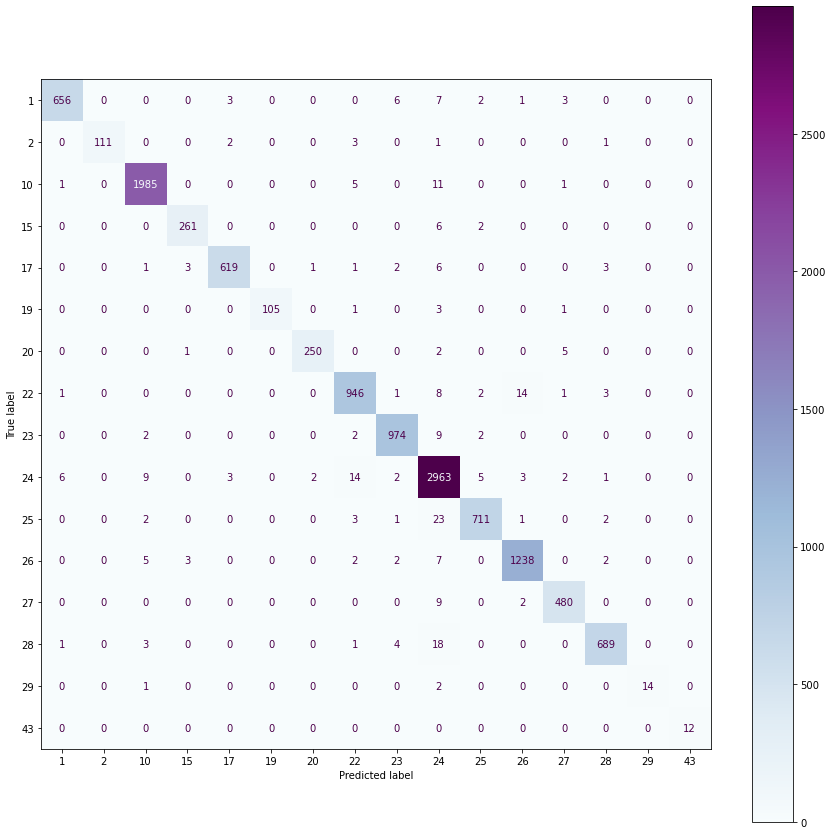

In [59]:
fig, ax = plt.subplots(figsize=(15, 15))
plot_confusion_matrix(model, X_test, y_test, ax=ax, cmap = 'BuPu')

## K Means Clustering

In [60]:
from matplotlib import cm
import os
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.graph_objs import *
import seaborn as sns


In [61]:
df = pd.read_csv('../input/youtube-new/USvideos.csv')
df.head()

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  comment_count                                  thumbnail_link  \
0      2966          15954  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
1      6146          12703  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3       666           2146  https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg   
4      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...  
1  One year after the presidential election, John...  
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...  
3  Today we find out if Link is a Nickelback amat...  
4  I know it's been a while since we did this sho...

In [62]:
df.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

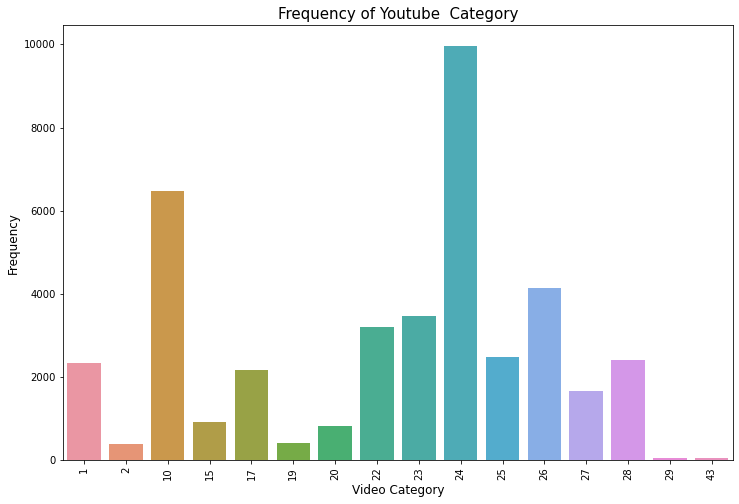

In [63]:
plt.figure(figsize=(12,8))
sns.countplot(x="category_id", data=df)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Video Category', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Youtube  Category", fontsize=15)
plt.show()

In [64]:
cluster = df[['likes','dislikes', 'views', 'comment_count']]

## PCA and Clustering

### Agglomerative Clustering

In [65]:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans

In [66]:
x = df[['likes','dislikes', 'views', 'comment_count']]


In [67]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_normalized = normalize(x_scaled)
x_normalized = pd.DataFrame(x_normalized)

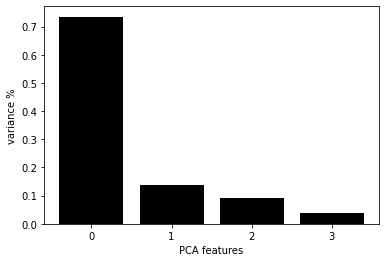

In [72]:

pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x_normalized)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

Text(0, 0.5, 'PCA 2')

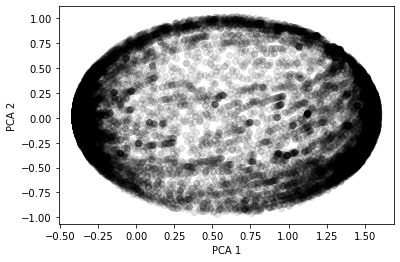

In [78]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

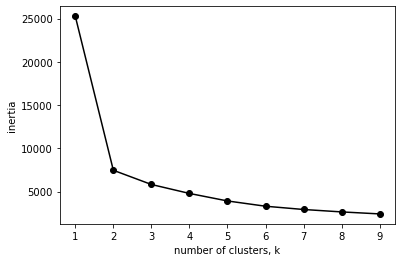

In [74]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [80]:
#5 According to the Elbow graph we deterrmine the clusters number as 
#5. Applying k-means algorithm to the X dataset.
kmeans = KMeans(n_clusters=2, init ='k-means++', max_iter=300, n_init=10,random_state=0 )

In [81]:
y_kmeans = kmeans.fit_predict(PCA_components.iloc[:,:3])

In [84]:
X = PCA_components.iloc[:,:3]

#6 Visualising the clusters
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')

#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.show()

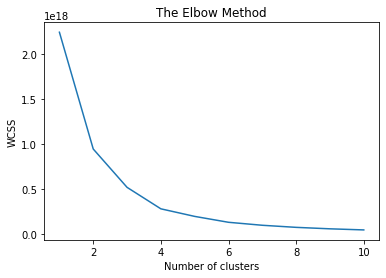

In [86]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(cluster)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

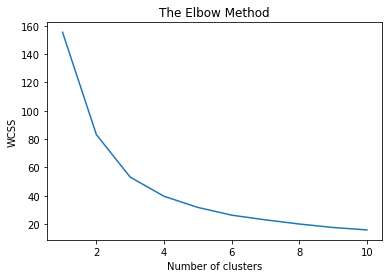

In [87]:
df2 = cluster.apply(lambda x:(x.astype(float) - min(x))/(max(x)-min(x)), axis = 0)
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(df2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [88]:
kmeans = KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0) 
y_kmeans = kmeans.fit_predict(df2)
df2['cluster']=y_kmeans

In [89]:
trace1 = go.Scatter3d(
    x = df2['likes'].values,
    y = df2['comment_count'].values,
    z = df2['views'].values,
    mode='markers',
    marker=dict(
        size=12,
        color=df2['cluster'].values,# set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
    
)

data = [trace1]
layout = go.Layout(
    scene=Scene(
        xaxis=XAxis(title='Likes'),
        yaxis=YAxis(title='Comment'),
        zaxis=ZAxis(title='Views')
        ),
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale')

/opt/conda/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:550: DeprecationWarning:

plotly.graph_objs.XAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.XAxis
  - plotly.graph_objs.layout.scene.XAxis


/opt/conda/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:578: DeprecationWarning:

plotly.graph_objs.YAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.YAxis
  - plotly.graph_objs.layout.scene.YAxis


/opt/conda/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:603: DeprecationWarning:

plotly.graph_objs.ZAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.scene.ZAxis


/opt/conda/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:494: DeprecationWarning:

plotly.graph_objs.Scene is deprecated.
Please replace it with one of the following more spec